In [5]:
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)

molecule = Molecule(
    geometry=[["Li", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, 2.5]]], charge=0, multiplicity=1
)
driver = ElectronicStructureMoleculeDriver(
    molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
)

In [6]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper

In [7]:
es_problem = ElectronicStructureProblem(driver)
second_q_op = es_problem.second_q_ops()
print(second_q_op["ElectronicEnergy"])

Fermionic Operator
register length=12, number terms=1860
  -4.609054260089359 * ( +_0 -_0 )
+ 0.09644507677085376 * ( +_0 -_1 )
+ 0.15894568824880217 * ( +_0 -_2 )
+ 0.049719385529997315 * ( +_0 -_5 )
+ 0.09644507677085372 * ( +_1 -_0 )
+ -1.21132290194 ...


In [4]:
from qiskit_nature.settings import settings

settings.dict_aux_operators = True

In [8]:
qubit_converter = QubitConverter(mapper=JordanWignerMapper())
qubit_op = qubit_converter.convert(second_q_op["ElectronicEnergy"])
print(qubit_op)

-4.959411017549148 * IIIIIIIIIIII
+ 0.9984281047897633 * IIIIIIIIIIIZ
+ 0.012638766280135777 * IIIIIIIIIIYY
+ 0.012638766280135777 * IIIIIIIIIIXX
+ 0.0233634621152246 * IIIIIIIIIYZY
+ 0.0233634621152246 * IIIIIIIIIXZX
+ 0.004818552105363922 * IIIIIIYZZZZY
+ 0.004818552105363922 * IIIIIIXZZZZX
- 0.12844376090760942 * IIIIIIIIIIZI
+ 0.0003453868610112502 * IIIIIIIIIYYI
+ 0.0003453868610112502 * IIIIIIIIIXXI
+ 0.014656674233476153 * IIIIIIYZZZYI
+ 0.014656674233476153 * IIIIIIXZZZXI
- 0.19295222883700813 * IIIIIIIIIZII
- 0.018927578174935653 * IIIIIIYZZYII
- 0.018927578174935653 * IIIIIIXZZXII
- 0.2352997868252997 * IIIIIIIIZIII
- 0.2352997868252999 * IIIIIIIZIIII
- 0.2736938225345829 * IIIIIIZIIIII
+ 0.998428104789763 * IIIIIZIIIIII
+ 0.012638766280135775 * IIIIYYIIIIII
+ 0.012638766280135775 * IIIIXXIIIIII
+ 0.023363462115224633 * IIIYZYIIIIII
+ 0.023363462115224633 * IIIXZXIIIIII
+ 0.0048185521053638975 * YZZZZYIIIIII
+ 0.0048185521053638975 * XZZZZXIIIIII
- 0.12844376090760953 * IIIIZ

In [9]:
qubit_converter = QubitConverter(mapper=ParityMapper(), two_qubit_reduction=True)
qubit_op = qubit_converter.convert(
    second_q_op["ElectronicEnergy"], num_particles=es_problem.num_particles
)
print(qubit_op)

-4.959411017549096 * IIIIIIIIII
+ 0.998428104789753 * IIIIIIIIIZ
- 0.012638766280135641 * IIIIIIIIZX
+ 0.012638766280135641 * IIIIIIIIIX
- 0.023363462115224352 * IIIIIIIZXX
- 0.023363462115224352 * IIIIIIIIYY
- 0.004818552105363895 * IIIIIXXXXX
- 0.004818552105363871 * IIIIIYXXXY
- 0.12844376090760803 * IIIIIIIIZZ
- 0.0003453868610112465 * IIIIIIIZXZ
+ 0.0003453868610112465 * IIIIIIIIXI
- 0.014656674233476073 * IIIIIXXXXZ
- 0.014656674233475999 * IIIIIYXXYI
- 0.19295222883700608 * IIIIIIIZZI
+ 0.01892757817493555 * IIIIIXXXZI
+ 0.018927578174935452 * IIIIIYXYII
- 0.2352997868252972 * IIIIIIZZII
- 0.23529978682529742 * IIIIIZZIII
- 0.2736938225345814 * IIIIIZIIII
+ 0.9984281047897575 * IIIIZIIIII
- 0.012638766280135705 * IIIZXIIIII
+ 0.012638766280135641 * IIIIXIIIII
- 0.02336346211522451 * IIZXXIIIII
- 0.023363462115224387 * IIIYYIIIII
- 0.004818552105363896 * XXXXXIIIII
- 0.004818552105363846 * YXXXYIIIII
- 0.12844376090760817 * IIIZZIIIII
- 0.00034538686101124433 * IIZXZIIIII
+ 0.000

In [10]:
import numpy as np
import pylab

from qiskit import Aer
from qiskit.opflow import X, Z, I
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit.circuit.library import TwoLocal

In [11]:
qubit_op

TaperedPauliSumOp(SparsePauliOp(['IIIIIIIIII', 'IIIIIIIIIZ', 'IIIIIIIIZX', 'IIIIIIIIIX', 'IIIIIIIZXX', 'IIIIIIIIYY', 'IIIIIXXXXX', 'IIIIIYXXXY', 'IIIIIIIIZZ', 'IIIIIIIZXZ', 'IIIIIIIIXI', 'IIIIIXXXXZ', 'IIIIIYXXYI', 'IIIIIIIZZI', 'IIIIIXXXZI', 'IIIIIYXYII', 'IIIIIIZZII', 'IIIIIZZIII', 'IIIIIZIIII', 'IIIIZIIIII', 'IIIZXIIIII', 'IIIIXIIIII', 'IIZXXIIIII', 'IIIYYIIIII', 'XXXXXIIIII', 'YXXXYIIIII', 'IIIZZIIIII', 'IIZXZIIIII', 'IIIXIIIIII', 'XXXXZIIIII', 'YXXYIIIIII', 'IIZZIIIIII', 'XXXZIIIIII', 'YXYIIIIIII', 'IZZIIIIIII', 'ZZIIIIIIII', 'ZIIIIIIIII', 'IIIIIIIIZI', 'IIIIIIIZXI', 'IIIIIIIIXZ', 'IIIIIXXXXI', 'IIIIIYXXYZ', 'IIIIIIIZZZ', 'IIIIIXXXZZ', 'IIIIIYXYIZ', 'IIIIIIZZIZ', 'IIIIIZZIIZ', 'IIIIIZIIIZ', 'IIIIIIIZYY', 'IIIIIIIIXX', 'IIIIIXXXYY', 'IIIIIYXXYX', 'IIIIIIIZIX', 'IIIIIIIZZX', 'IIIIIXXYIY', 'IIIIIXXXIX', 'IIIIIYXYZX', 'IIIIIXXXZX', 'IIIIIYXYIX', 'IIIIIYXXIY', 'IIIIIIZZZX', 'IIIIIIZZIX', 'IIIIIZZIZX', 'IIIIIZZIIX', 'IIIIIZIIZX', 'IIIIIZIIIX', 'IIIIIXXYYX', 'IIIIIYXYYY', 'IIIIIIZIXX', '

In [12]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')

    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=qubit_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

Optimization complete      


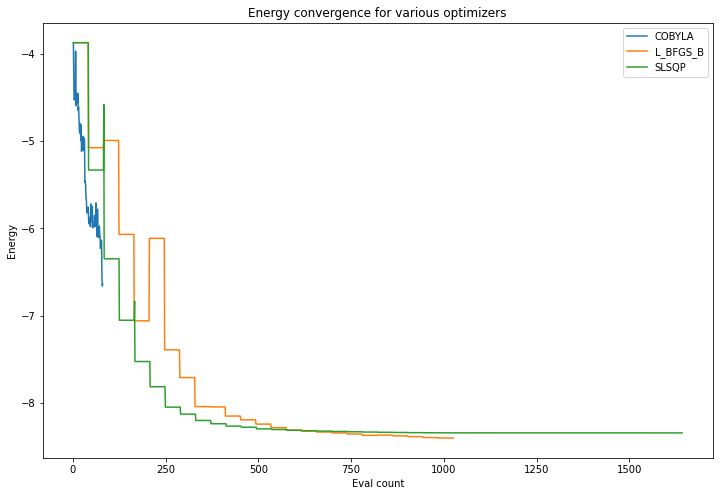

In [13]:
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right');

In [15]:
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(operator=qubit_op)
ref_value = result.eigenvalue.real
print(f'Reference value: {ref_value:.5f}')

Reference value: -8.45874


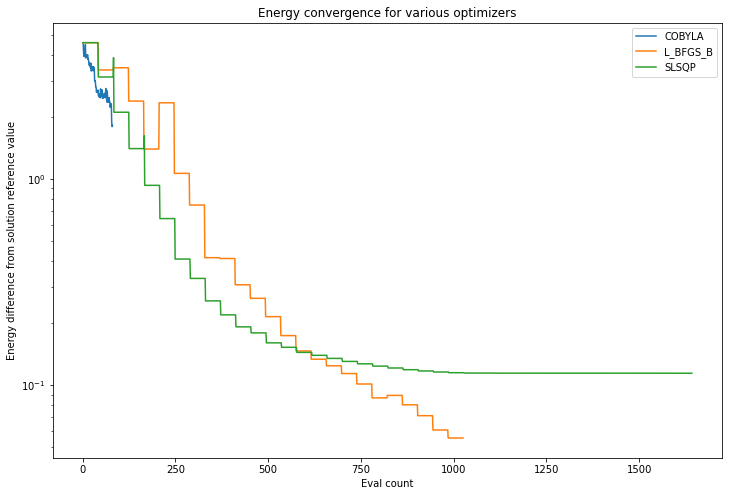

In [16]:
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], abs(ref_value - converge_vals[i]), label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from solution reference value')
pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
pylab.legend(loc='upper right');

In [17]:
import numpy as np
import pylab

from qiskit import Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import I, X, Z

In [18]:
print(f'Number of qubits: {qubit_op.num_qubits}')

Number of qubits: 10


In [19]:
print(f'Number of qubits: {H2_op.num_qubits}')

NameError: name 'H2_op' is not defined

In [20]:
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(operator=qubit_op)
ref_value = result.eigenvalue.real
print(f'Reference value: {ref_value:.5f}')

Reference value: -8.45874


In [21]:
seed = 170
iterations = 125
algorithm_globals.random_seed = seed
backend = Aer.get_backend('aer_simulator')
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed) 

counts = []
values = []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatz, optimizer=spsa, callback=store_intermediate_result, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(operator=qubit_op)
print(f'VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -7.86171
Delta from reference energy value is 0.59703


Text(0.5, 1.0, 'Convergence with no noise')

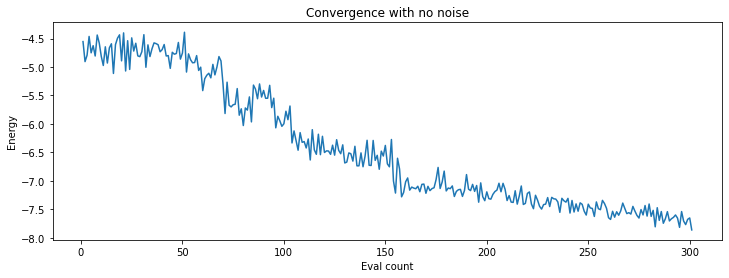

In [23]:

pylab.rcParams['figure.figsize'] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Convergence with no noise')

In [52]:
import os
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeSydney

device_backend = FakeSydney()

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()

algorithm_globals.random_seed = seed
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                     coupling_map=coupling_map, noise_model=noise_model,)

def store_intermediate_result1(eval_count, parameters, mean, std):
    counts1.append(eval_count)
    values1.append(mean)

var_form = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatz, optimizer=spsa, callback=store_intermediate_result1, quantum_instance=qi)
result1 = vqe.compute_minimum_eigenvalue(operator=qubit_op)
print(f'VQE on Aer qasm simulator (with noise): {result1.eigenvalue.real:.10f}')
print(f'Delta from reference energy value is {(result1.eigenvalue.real - ref_value):.10f}')

/tmp/ipykernel_28135/1315312762.py:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeSydney


NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector', 'snapshot', 'sx', 'x']
  Instructions with noise: ['measure', 'cx', 'x', 'sx', 'id', 'reset']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)

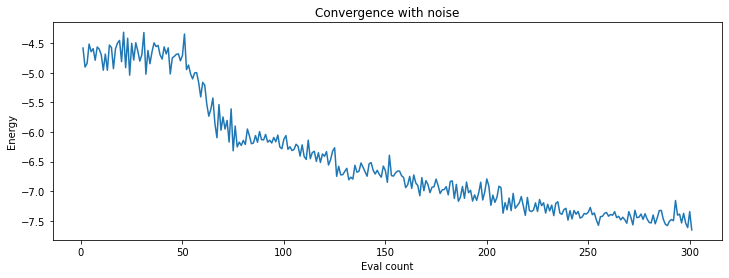

In [53]:
if counts1 or values1:
    pylab.rcParams['figure.figsize'] = (12, 4)
    pylab.plot(counts1, values1)
    pylab.xlabel('Eval count')
    pylab.ylabel('Energy')
    pylab.title('Convergence with noise')

In [54]:
from qiskit.utils.mitigation import CompleteMeasFitter

counts2 = []
values2 = []
if noise_model is not None:
    algorithm_globals.random_seed = seed
    qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                         coupling_map=coupling_map, noise_model=noise_model, 
                         measurement_error_mitigation_cls=CompleteMeasFitter, 
                         cals_matrix_refresh_period=30)

    def store_intermediate_result2(eval_count, parameters, mean, std):
        counts2.append(eval_count)
        values2.append(mean)

    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    spsa = SPSA(maxiter=iterations)
    vqe = VQE(ansatz, optimizer=spsa, callback=store_intermediate_result2, quantum_instance=qi)
    result2 = vqe.compute_minimum_eigenvalue(operator=qubit_op)
    print(f'VQE on Aer qasm simulator (with noise and measurement error mitigation): {result2.eigenvalue.real:.5f}')
    print(f'Delta from reference energy value is {(result2.eigenvalue.real - ref_value):.5f}')

QiskitError: 'Keyboard interrupt in parallel_map.'

In [48]:
if counts2 or values2:
    pylab.rcParams['figure.figsize'] = (12, 4)
    pylab.plot(counts2, values2)
    pylab.xlabel('Eval count')
    pylab.ylabel('Energy')
    pylab.title('Convergence wiSSubth noise, measurement error mitigation enabled')

In [49]:
print(f'Reference value: {ref_value:.5f}')
print(f'VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}')
print(f'VQE on Aer qasm simulator (with noise): {result1.eigenvalue.real:.5f}')
print(f'VQE on Aer qasm simulator (with noise and measurement error mitigation): {result2.eigenvalue.real:.5f}')

Reference value: -8.45874
VQE on Aer qasm simulator (no noise): -7.86171


NameError: name 'result1' is not defined